<a href="https://colab.research.google.com/github/EbubeObioma/EbubeObioma/blob/main/Analytics_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytics Challenge


#Problem Statement
The challenge of this exercise is to analyze the lead information in the dataset in order to understand lead quality trends and find oppurtunities for optimization.


# Importing the important libraries

In [ ]:
import pandas as pd # Basic library in python for dataframe computations
import numpy as np  # Library for numeric computation
import matplotlib.pyplot as plt # Basic library for data visualization
import seaborn as sns # Slightly advanced library for data visualization
from scipy import stats # Library for statistical computation
from datetime import datetime #Library for date time manipulation
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the Data
data = pd.read_excel('/content/drive/MyDrive/Python for Data/Analyst case study dataset 1.xls', sheet_name='Sheet1')


# Initial Data Exploration

In [ ]:
data.shape

(3021, 24)

The data set has 3021 Rows and 24 Columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   LeadCreated                  3021 non-null   datetime64[ns]
 1   FirstName                    3021 non-null   object        
 2   Email                        3021 non-null   object        
 3   VendorLeadID                 3013 non-null   object        
 4   CallStatus                   881 non-null    object        
 5   WidgetName                   3021 non-null   object        
 6   PublisherZoneName            3021 non-null   object        
 7   PublisherCampaignName        3021 non-null   object        
 8   AddressScore                 1171 non-null   float64       
 9   PhoneScore                   1393 non-null   float64       
 10  AdvertiserCampaignName       3021 non-null   object        
 11  State                        3021 non-null 

20 columns are object type, 3 floating point columns and 1 datetime column.

In [ ]:
data.head()

,LeadCreated,FirstName,Email,VendorLeadID,CallStatus,WidgetName,PublisherZoneName,PublisherCampaignName,AddressScore,PhoneScore,...,Partner,ReferralDomain,MarketingCampaign,AdGroup,Keyword,SearchQuery,ReferralURL,ReferralURL Parameters,LandingPageURL,Landing Page URL Parameters
0,2009-07-01 01:24:29.563,Dorinda,kanani@sandwichisles.net,FDF81FDA-A649-437B-B99C-FDDE74F7971B,NaN,w-302252-DebtReduction1-1DC-CreditSolutions,TopLeft-302252,DebtReductionInc,NaN,5.0,...,google,www.google.com,Debt Holding Tank,Holding Tank - Debt,Debt specialists,debt specialists,http://www.google.com/search,sourceid=navclient&aq=1&oq=debt sp&ie=UTF-8&rl...,http://www.debtreductioninc.com/index8.html,utm_source=google&utm_medium=CPC&utm_content=H...
1,2009-04-13 15:27:35.990,Presetta,clerk2@ustconline.net,4190ACB7-5026-416C-B987-ED8AD427D5E6,NaN,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,NaN,Financial Services,Consolidate,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
2,2009-04-21 07:22:59.000,Gina,wagoner_gina@yahoo.com,hFg80jf_R0CRN55hdhWILw,Unable to contact - Bad Contact Information,w-300250-DebtReduction1-1DC-Head2,TopLeft-302252,DebtReductionInc,NaN,NaN,...,AdKnowledge,us.mc582.mail.yahoo.com,Financial Services,Consolidate,NaN,NaN,http://us.mc582.mail.yahoo.com/mc/showMessage,&fid=Inbox&sort=date&order=down&startMid=0&.ra...,http://www.debtreductioninc.com/index8.html,utm_source=AdKnowledge&utm_medium=CPC&utm_cont...
3,2009-08-03 19:39:02.000,Kari,usa4ley@yahoo.com,jB01QgYZxkWArI9jWxuufw,Contacted - Doesn't Qualify,w-302252-DebtReduction1-1DC-white,TopLeft-302252,DebtReductionInc,5.0,3.0,...,Google,norwich.kijiji.com,DebtReductionInc,Lower Payments,NaN,NaN,http://norwich.kijiji.com/c-Cars-vehicles-Cars...,NaN,http://www.debtreductioninc.com/index12.html,utm_source=Google&utm_medium=cpc&utm_campaign=...
4,2009-04-13 10:18:37.490,Stephanie,sr1lambert@embarqmail.com,D5B32074-458E-40EC-B185-1FEF20AC626D,NaN,w-300250-DebtReduction1-1DC-BlueMeter,TopLeft-302252,DebtReductionInc,NaN,NaN,...,Google,NaN,DebtReductionInc,Debt Reduction,NaN,NaN,NaN,NaN,http://www.debtreductioninc.com/index8.html,utm_source=Google&utm_medium=cpc&utm_campaign=...


In [ ]:
data['LeadCreated'] = pd.to_datetime(data['LeadCreated'])
data['Date'] = data['LeadCreated'].dt.date
data['YearMonth'] = data['LeadCreated'].dt.to_period('M')
data['Week'] = data['LeadCreated'].dt.to_period('W')

In [ ]:
print(f"\nDate Range: {data['LeadCreated'].min()} to {data['LeadCreated'].max()}")
print(f"Time Span: {(data['LeadCreated'].max() - data['LeadCreated'].min()).days} days")



Date Range: 2009-04-02 18:52:41 to 2009-09-30 21:00:20.080000
Time Span: 181 days


In [ ]:
data.isnull().sum() #Checking for null values in the data frame

,0
LeadCreated,0
FirstName,0
Email,0
VendorLeadID,8
CallStatus,2140
WidgetName,0
PublisherZoneName,0
PublisherCampaignName,0
AddressScore,1850
PhoneScore,1628


# Observation
We see that CallStatus, AddressScore, PhoneScore, IP Address, RefferalDomain, MarketingCampaingn, AdGroup, Keyword, SearchQuery, RefferalURL, RefferalURL Parameters have null values.

For the purpose of this analysis, I'll focus on the CallStatus to define our performance metric which is **Lead Quality**

I'll also take into account the note made on widget w-302252 and w-300250 being the same size.

In [ ]:
 # To handle NULL values in CallStatus (treating as "Unknown")
data['CallStatus'] = data['CallStatus'].fillna('Unknown')

# Cleaning up WidgetName (Since 302252 and 300250 are the same size)
data['WidgetName_Clean'] = data['WidgetName'].str.replace('w-302252-', 'w-300250-')


# Defining and Exploring Lead Quality
The first thing I want to do is define the Lead quality metrics.


I'll start by categorizing leads based on their CallStatus.
   
    Good Quality: Closed + EP Sent/Received/Confirmed
    Bad Quality: Unable to Contact + Invalid Profile + Doesn't Qualify
    Unknown: All other statuses

In [ ]:
def cat_lead_quality(status): # Defining a function to categorize lead quality

    good_statuses = ['Closed', 'EP Sent', 'EP Received', 'EP Confirmed']
    bad_statuses = ['Unable to contact - Bad Contact Information',
                    'Contacted - Invalid Profile',
                    'Contacted - Doesn\'t Qualify']

    if status in good_statuses:
        return 'Good Quality'
    elif status in bad_statuses:
        return 'Bad Quality'
    else:
        return 'Unknown'

data['LeadQuality'] = data['CallStatus'].apply(cat_lead_quality)

print("\nLead Quality Distribution:")
print(data['LeadQuality'].value_counts())
print(f"\nLead Quality Percentages:")
print(data['LeadQuality'].value_counts(normalize=True) * 100)


Lead Quality Distribution:
LeadQuality
Unknown         2140
Bad Quality      488
Good Quality     393
Name: count, dtype: int64

Lead Quality Percentages:
LeadQuality
Unknown         70.837471
Bad Quality     16.153592
Good Quality    13.008937
Name: proportion, dtype: float64


# Observation
As expected majority of the leads (2140) have unknown statuses. This is a common occurrence in large datasets, often due to incomplete data entry or gaps in information tracking.

Only 13% of the leads meet our standard for good quality which is that they are closed, EP has been sent received and confirmed.

In [ ]:
# Overall lead quality rate (Good leads / Total leads with known status)
known_leads = data[data['LeadQuality'] != 'Unknown']
overall_quality_rate = (data['LeadQuality'] == 'Good Quality').sum() / len(data) * 100
overall_quality_rate_known = (known_leads['LeadQuality'] == 'Good Quality').sum() / len(known_leads) * 100

print(f"\n Overall Lead Quality Rate (all leads): {overall_quality_rate:.2f}%")
print(f" Overall Lead Quality Rate (known status only): {overall_quality_rate_known:.2f}%")



 Overall Lead Quality Rate (all leads): 13.01%
 Overall Lead Quality Rate (known status only): 44.61%


Detailed CallStatus Breakdown

In [ ]:
status_counts = data['CallStatus'].value_counts()
for status, count in status_counts.items():
    pct = count / len(data) * 100
    quality = cat_lead_quality(status)
    print(f"  {status}: {count} ({pct:.1f}%) → {quality}")

  Unknown: 2140 (70.8%) → Unknown
  Closed: 245 (8.1%) → Good Quality
  Contacted - Doesn't Qualify: 212 (7.0%) → Bad Quality
  Unable to contact - Bad Contact Information: 191 (6.3%) → Bad Quality
  EP Confirmed: 130 (4.3%) → Good Quality
  Contacted - Invalid Profile: 85 (2.8%) → Bad Quality
  EP Sent: 16 (0.5%) → Good Quality
  EP Received: 2 (0.1%) → Good Quality


# Answering Key Questions


1.   Are we seeing any lead quality trends over time (improving, declining)?

    To answer this question I'll first calculate the lead quality rate per week.

In [ ]:

weekly_quality = data.groupby('Week').agg({  # Grouping data by week
    'VendorLeadID': 'count',     # Aggregating the generated subgroups by counting the number of VendorLeadID per group
    'LeadQuality': lambda x: (x == 'Good Quality').sum() # Aggregating the generated subgroups performing a boolean function to the LeadQuality column
}).rename(columns={'VendorLeadID': 'Total_Leads', 'LeadQuality': 'Good_Leads'}) # Renaming the Aggregated columns

weekly_quality['Quality_Rate'] = (weekly_quality['Good_Leads'] / weekly_quality['Total_Leads']) * 100
weekly_quality['Week_Str'] = weekly_quality.index.astype(str) # Creating a new dataframe indexed by the week set as a string type and containing three columns,
                                                                #Total_Leads, Good_Leads and Quality rate which is the percentage of good leads to total leads.
print("\nSummary Statistics for weekly_quality:")
weekly_quality.describe().T



Summary Statistics for weekly_quality:


,count,mean,std,min,25%,50%,75%,max
Total_Leads,27.0,111.592593,33.246468,37.000000,95.000000,115.000000,134.000000,165.000000
Good_Leads,27.0,14.555556,5.604485,6.000000,10.000000,13.000000,18.500000,25.000000
Quality_Rate,27.0,13.413152,4.194625,6.818182,9.662061,12.727273,16.395029,24.615385


# Observation
The dataset spans 27 weeks. On average, there were about 112 leads per week, of which roughly 15 were good leads. This corresponds to an average weekly lead quality rate of 13.4%. Lead volumes varied between 37 and 165 per week, while good leads ranged from 6 to 25 per week. The weekly quality rate was more stable, typically falling between 9.7% (25th percentile) and 16.4% (75th percentile), though it reached as high as 24.6% in the best week.

In [ ]:
weekly_quality.loc[weekly_quality['Quality_Rate'] == weekly_quality['Quality_Rate'].max()]  # Showing the best week

,Total_Leads,Good_Leads,Quality_Rate,Week_Str
Week,,,,
2009-09-07/2009-09-13,65,16,24.615385,2009-09-07/2009-09-13


In [ ]:
weekly_quality.loc[weekly_quality['Quality_Rate'] == weekly_quality['Quality_Rate'].min()] # Showing the worst week


,Total_Leads,Good_Leads,Quality_Rate,Week_Str
Week,,,,
2009-05-25/2009-05-31,132,9,6.818182,2009-05-25/2009-05-31


To find the trend or slope of weekly lead quality over the timespan of the dataframe, I'll compute the linear regression.

In [ ]:
# Statistical test for trend: Linear Regression
from sklearn.linear_model import LinearRegression

# Prepare data for regression
weekly_quality_reset = weekly_quality.reset_index(drop=True)
x = np.arange(len(weekly_quality_reset)).reshape(-1, 1)  # Time as independent variable
y = weekly_quality_reset['Quality_Rate'].values          # Quality Rate as dependent variable

# Fit linear regression
model = LinearRegression()
model.fit(x, y)
trend_slope = model.coef_[0]
r_squared = model.score(x, y)

# Statistical significance test
n = len(x)
se = np.sqrt(np.sum((y - model.predict(x))**2) / (n - 2)) / np.sqrt(np.sum((x - x.mean())**2))
t_stat = trend_slope / se
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), n - 2))

print(f"\n TREND ANALYSIS RESULTS:")
print(f"   Slope: {trend_slope:.4f} percentage points per week")
print(f"   R-squared: {r_squared:.4f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Significance: {' STATISTICALLY SIGNIFICANT' if p_value < 0.05 else ' NOT SIGNIFICANT'} (α=0.05)")

if trend_slope > 0:
    print(f"   Interpretation: Quality is IMPROVING over time")
elif trend_slope < 0:
    print(f"   Interpretation: Quality is DECLINING over time")
else:
    print(f"   Interpretation: Quality is STABLE over time")


 TREND ANALYSIS RESULTS:
   Slope: 0.0705 percentage points per week
   R-squared: 0.0178
   P-value: 0.5068
   Significance:  NOT SIGNIFICANT (α=0.05)
   Interpretation: Quality is IMPROVING over time


# Visualization

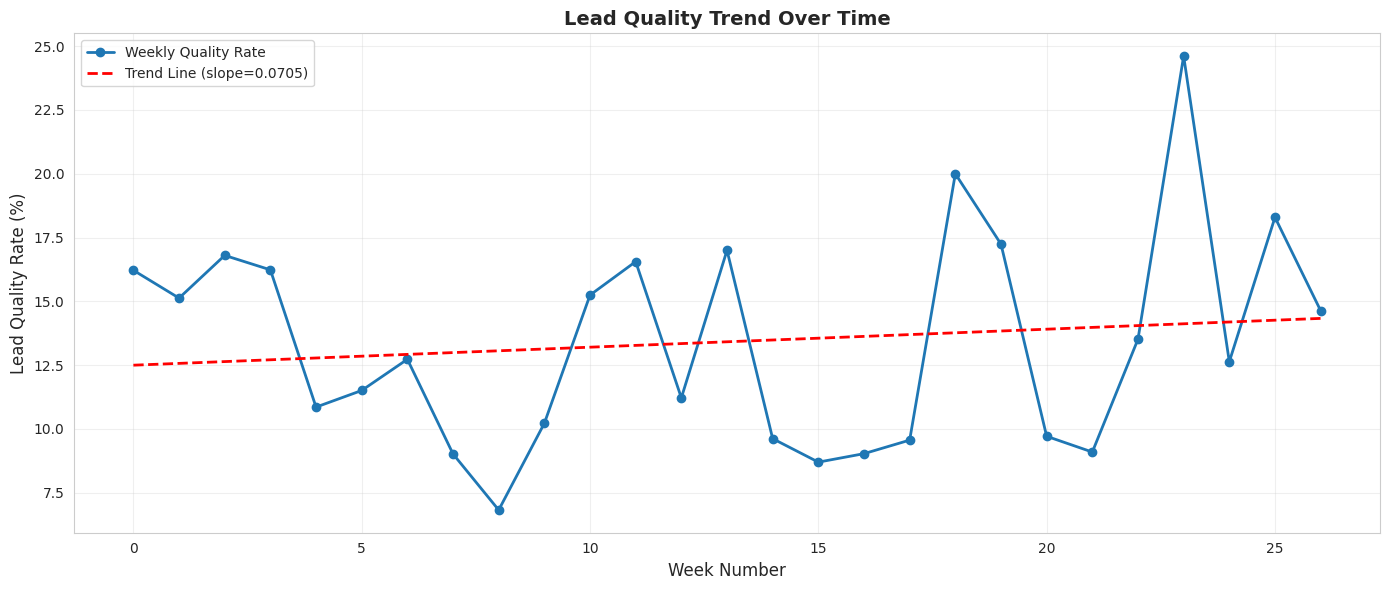


 Weekly data points: 27


In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(range(len(weekly_quality_reset)), weekly_quality_reset['Quality_Rate'],
         marker='o', linewidth=2, markersize=6, label='Weekly Quality Rate')
plt.plot(range(len(weekly_quality_reset)), model.predict(X),
         'r--', linewidth=2, label=f'Trend Line (slope={trend_slope:.4f})')
plt.xlabel('Week Number', fontsize=12)
plt.ylabel('Lead Quality Rate (%)', fontsize=12)
plt.title('Lead Quality Trend Over Time', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n Weekly data points: {len(weekly_quality_reset)}")

# Observavtion
Slope: 0.0705 percentage points per week. This shows that on average, the Quality_Rate is increasing by about 0.07% per week.

R-squared: 0.0178. This tells me that the model explains only 1.8% of the variation in the data. That means the trend line doesn’t fit the data well; most of the variation is due to other factors or random noise.

P-value: 0.5068. Since this is much larger than 0.05, we fail to reject the null hypothesis. In other words, the slope is not statistically different from zero.

Significance: NOT SIGNIFICANT. The upward trend we observed could easily be due to chance; there is no strong evidence of a meaningful trend in the data.

Interpretation:
Even though the slope suggests a small upward trend (0.07% per week), the very low R² and high p-value indicate the trend is weak and not statistically significant. There’s no reliable evidence of a consistent upward or downward pattern over time.



2.   What can we learn about the drivers of "lead quality" from this dataset? What segments -
where the ad was shown, what kind of person filled out the ad, what kind of ad did they see -
have differing lead quality rates?

In [ ]:
# Setting up a function to analyze segments
def analyze_segment(data, column_name, min_sample_size=30):

    segment_analysis = data.groupby(column_name).agg({
        'VendorLeadID': 'count',
        'LeadQuality': lambda x: (x == 'Good Quality').sum()
    }).rename(columns={'VendorLeadID': 'Total_Leads', 'LeadQuality': 'Good_Leads'})

    segment_analysis['Quality_Rate'] = (segment_analysis['Good_Leads'] /
                                        segment_analysis['Total_Leads']) * 100

    # Filter for sample size
    segment_analysis = segment_analysis[segment_analysis['Total_Leads'] >= min_sample_size]

    # Sort by quality rate
    segment_analysis = segment_analysis.sort_values('Quality_Rate', ascending=False)

    return segment_analysis

                                              Total_Leads  Good_Leads  Quality_Rate
WidgetName_Clean                                                                   
w-300250-DebtReduction1-1DC-Head2                      89          14     15.730337
w-300250-DebtReduction1-1DC-BlueMeter                  92          14     15.217391
w-300250-DebtReduction1-1DC                           619          88     14.216478
w-300250-DebtReduction1-2DC-BlueMeter                  87          12     13.793103
w-300250-DebtReduction1-1DC-yellowarrow-blue          230          31     13.478261
w-300250-DebtReduction1-1DC-CreditSolutions          1128         149     13.209220
w-300250-DebtReduction1-1DC-yellowarrow-dark          135          15     11.111111
w-300250-DebtReduction1-2DC-CreditSolutions            75           8     10.666667
w-300250-DebtReduction1-1DC-white                     434          45     10.368664
w-300250-DebtReduction1-1DC-Head3                      75           5      6

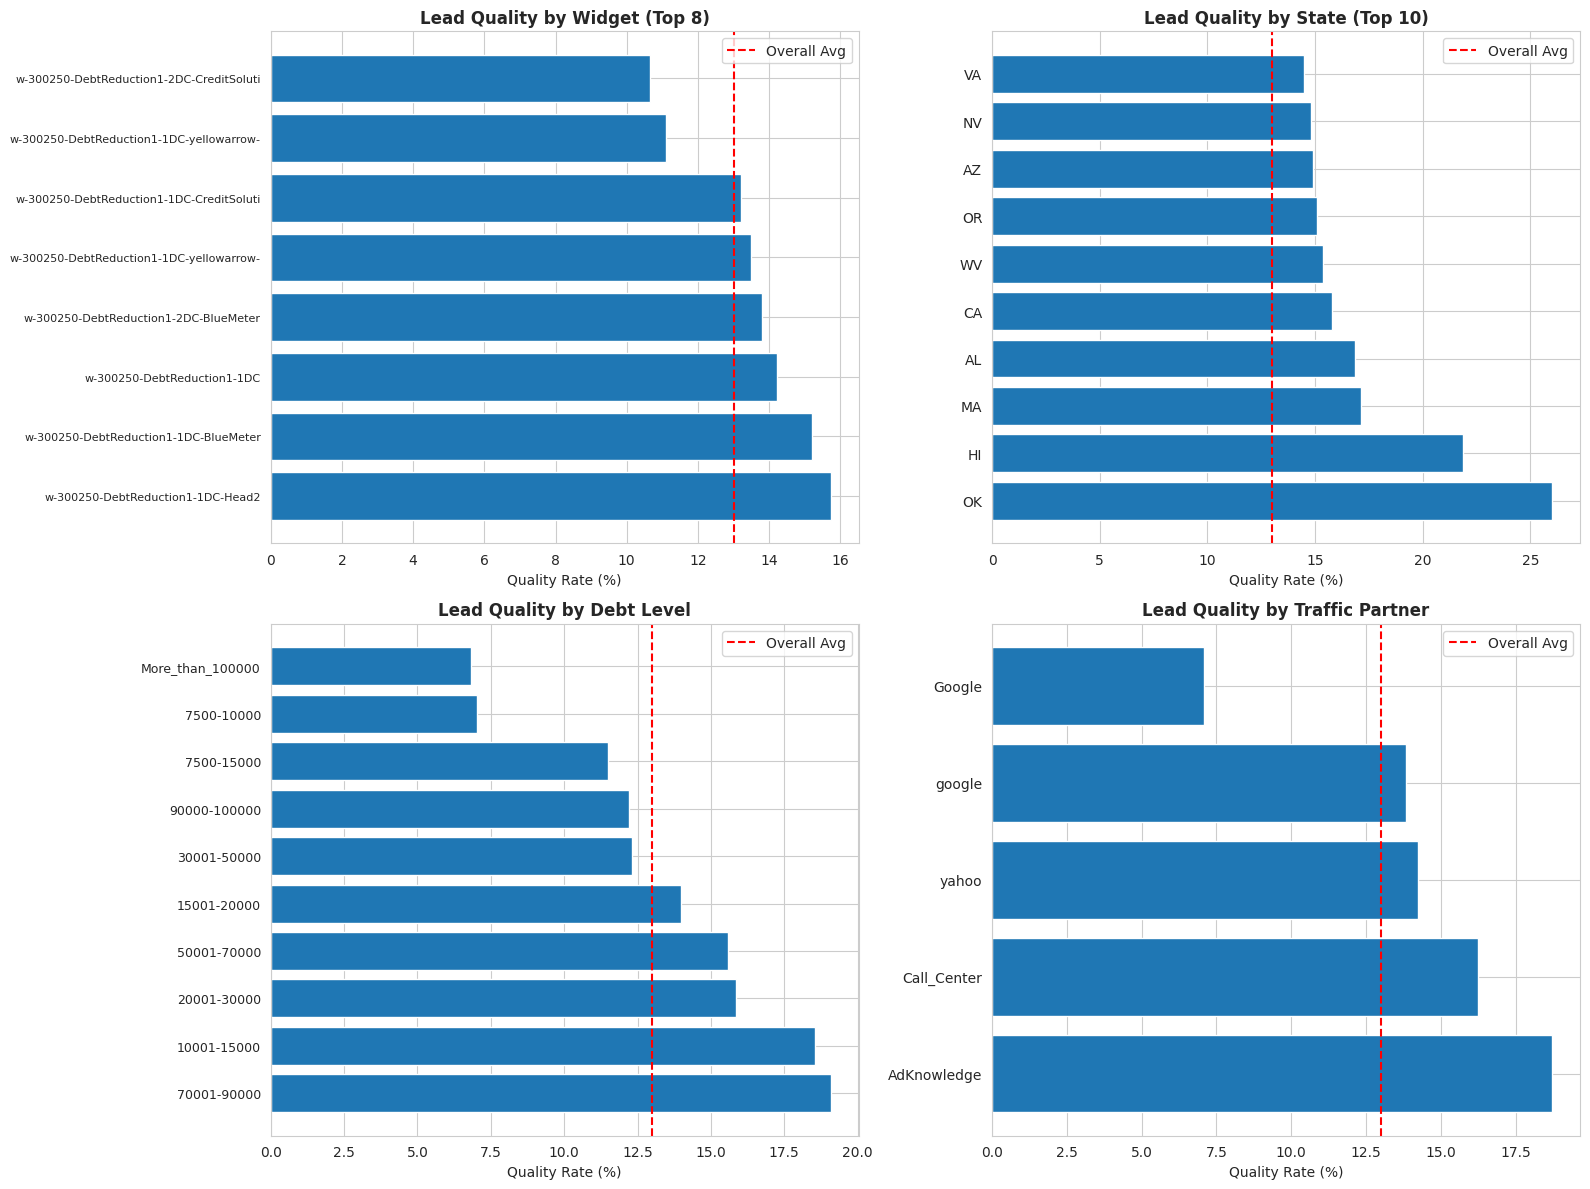

In [ ]:
# WIDGET NAME ANALYSIS
widget_analysis = analyze_segment(data, 'WidgetName_Clean', min_sample_size=50)
print(widget_analysis.to_string())

# Chi-square test for widget name
contingency_widget = pd.crosstab(data['WidgetName_Clean'], data['LeadQuality'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency_widget)
print(f"\nChi-square test: χ² = {chi2:.2f}, p-value = {p_val:.4f}")
print(f"Result: {' SIGNIFICANT DIFFERENCE' if p_val < 0.05 else ' NO SIGNIFICANT DIFFERENCE'}")

# LOCATION ANALYSIS
state_analysis = analyze_segment(data, 'State', min_sample_size=30)
print(state_analysis.head(10).to_string())
print(f"\n... showing top 10 of {len(state_analysis)} states")

# LEAD DEBT LEVEL ANALYSIS
debt_analysis = analyze_segment(data, 'DebtLevel', min_sample_size=30)
print(debt_analysis.to_string())

# PARTNER ANALYSIS (Traffic Source)
partner_analysis = analyze_segment(data, 'Partner', min_sample_size=30)
print(partner_analysis.to_string())

# ADVERTISER CAMPAIGN ANALYSIS
campaign_analysis = analyze_segment(data, 'AdvertiserCampaignName', min_sample_size=50)
print(campaign_analysis.to_string())

# PHONE SCORE ANALYSIS
data['PhoneScore_Clean'] = data['PhoneScore'].replace('NULL', np.nan)
data['PhoneScore_Clean'] = pd.to_numeric(data['PhoneScore_Clean'], errors='coerce')
phone_analysis = data.groupby('PhoneScore_Clean').agg({
    'VendorLeadID': 'count',
    'LeadQuality': lambda x: (x == 'Good Quality').sum()
}).rename(columns={'VendorLeadID': 'Total_Leads', 'LeadQuality': 'Good_Leads'})
phone_analysis['Quality_Rate'] = (phone_analysis['Good_Leads'] / phone_analysis['Total_Leads']) * 100
phone_analysis = phone_analysis[phone_analysis['Total_Leads'] >= 30]
print(phone_analysis.sort_values('Quality_Rate', ascending=False).to_string())

# PUBLISHER CAMPAIGN ANALYSIS
pub_campaign_analysis = analyze_segment(data, 'PublisherCampaignName', min_sample_size=50)
print(pub_campaign_analysis.to_string())

# Visualization: Top Performing Segments
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Widget performance
top_widgets = widget_analysis.head(8)
axes[0, 0].barh(range(len(top_widgets)), top_widgets['Quality_Rate'])
axes[0, 0].set_yticks(range(len(top_widgets)))
axes[0, 0].set_yticklabels([w[:40] for w in top_widgets.index], fontsize=8)
axes[0, 0].set_xlabel('Quality Rate (%)')
axes[0, 0].set_title('Lead Quality by Widget (Top 8)', fontweight='bold')
axes[0, 0].axvline(x=overall_quality_rate, color='red', linestyle='--', label='Overall Avg')
axes[0, 0].legend()

# State performance
top_states = state_analysis.head(10)
axes[0, 1].barh(range(len(top_states)), top_states['Quality_Rate'])
axes[0, 1].set_yticks(range(len(top_states)))
axes[0, 1].set_yticklabels(top_states.index, fontsize=10)
axes[0, 1].set_xlabel('Quality Rate (%)')
axes[0, 1].set_title('Lead Quality by State (Top 10)', fontweight='bold')
axes[0, 1].axvline(x=overall_quality_rate, color='red', linestyle='--', label='Overall Avg')
axes[0, 1].legend()

# Debt level performance
axes[1, 0].barh(range(len(debt_analysis)), debt_analysis['Quality_Rate'])
axes[1, 0].set_yticks(range(len(debt_analysis)))
axes[1, 0].set_yticklabels(debt_analysis.index, fontsize=9)
axes[1, 0].set_xlabel('Quality Rate (%)')
axes[1, 0].set_title('Lead Quality by Debt Level', fontweight='bold')
axes[1, 0].axvline(x=overall_quality_rate, color='red', linestyle='--', label='Overall Avg')
axes[1, 0].legend()

# Partner performance
axes[1, 1].barh(range(len(partner_analysis)), partner_analysis['Quality_Rate'])
axes[1, 1].set_yticks(range(len(partner_analysis)))
axes[1, 1].set_yticklabels(partner_analysis.index, fontsize=10)
axes[1, 1].set_xlabel('Quality Rate (%)')
axes[1, 1].set_title('Lead Quality by Traffic Partner', fontweight='bold')
axes[1, 1].axvline(x=overall_quality_rate, color='red', linestyle='--', label='Overall Avg')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Observation
1. Widget Performance

Widgets show statistically significant differences in lead quality (Chi-square test: Chi_square = 42.13, p = 0.0027).

The best-performing widget (w-300250-DebtReduction1-1DC-Head2) achieved a 15.7% quality rate, compared to just 6.7% for the weakest widget (Head3).


Not all widgets perform equally.

The choice of widget design has a measurable and statistically proven impact on lead quality.

Some widgets are more than twice as effective as others, which is a major insight for campaign optimization.
This suggests creative design or messaging strongly impacts lead quality.

2. State-Level Insights

Quality rates vary meaningfully across states.

Oklahoma (26.0%), Hawaii (21.9%), and Massachusetts (17.1%) stand out as top-performing states, well above the overall average (around 13–14%).

This indicates potential geographic targeting opportunities.

3. Debt Level Segmentation

Higher lead quality appears in the ($10k - $30k) lead debt range, with quality rates between 15.8–18.5%.

Leads with very high debt (> $100k) or very low debt  ($7500 – $10,000) show much lower quality rates (around 7%).

This suggests that campaigns are more effective with leads having mid-level debt ranges.

4. Partner / Traffic Source

Partners differ substantially in performance:

AdKnowledge leads with 18.7% quality rate.

Call centers perform well (16.2%) and may provide higher intent leads.

Google traffic is inconsistent: lowercase google performs decently (13.8%), while Google (separately logged) has very poor quality (7.1%), possibly due to data entry issues or channel mix differences. Standardizing Google traffic sources by merging “google” and “Google” into a single consistent category in the data pipeline, investigating mix differences, and deploying the top-performing widgets on weaker Google streams should lift lead quality and ensure consistent reporting

5. Campaign Performance (Advertiser & Publisher)

Branded campaigns (creditsolutions-branded-shortform) have slightly higher quality rates (~13%) than generic campaigns.

Publisher-level campaigns also show differences: DebtReductionCallCenter has a stronger performance (16.2%) than DebtReductionInc (12.7%), suggesting that distribution channel matters.

6. Phone Score Predictive Value

PhoneScore correlates with quality:

Leads with the highest PhoneScore (5) achieved the best quality rate (16.2%).

Lower scores (2–3) correlate with worse quality (10–11%).

This validates PhoneScore as a useful predictor of lead quality.

# Summary

Creative (Widget), Geography (State), and Partner (Traffic Source) are all statistically significant factors affecting lead quality.

The strongest segments (certain widgets, states like OK/HI, AdKnowledge traffic, mid-level debt ranges) outperform the average by 5–10 percentage points, showing clear optimization opportunities.

PhoneScore is a robust predictor and should be leveraged for lead prioritization.

Some inconsistencies (e.g., duplicate Google partner entries) point to data quality issues that should be cleaned for more reliable insights.


3. If the advertiser says they will increase our CPL by 20% (i.e., $30 to $33) if we increase our
lead quality by 20% (i.e., from 8.0% to 9.6%), do we see any opportunities to do that here?
What kinds of things could we do?

To answer this question, I will first establish the current baseline for the closed leads.

In [ ]:
# Current baseline (using only Closed for the 8% baseline mentioned)
closed_only_rate = (data['CallStatus'] == 'Closed').sum() / len(data) * 100
print(f"\nCurrent 'Closed' Rate: {closed_only_rate:.2f}%")
print(f"Target 'Closed' Rate: {closed_only_rate * 1.2:.2f}%")
print(f"Improvement Needed: {closed_only_rate * 0.2:.2f} percentage points")


Current 'Closed' Rate: 8.11%
Target 'Closed' Rate: 9.73%
Improvement Needed: 1.62 percentage points


In [ ]:
# Identify high-performing segments
print("\n HIGH-PERFORMING SEGMENTS (OPPORTUNITIES):")

# 1. Best Widgets
print("\n1  WIDGET OPTIMIZATION:")
best_widgets = widget_analysis[widget_analysis['Quality_Rate'] > overall_quality_rate * 1]
print(f"\nHigh-performing widgets ({len(best_widgets)} widgets above 100% of average):")
print(best_widgets[['Total_Leads', 'Quality_Rate']].to_string())

# 2. Best States
print("\n2 GEOGRAPHIC OPTIMIZATION:")
best_states = state_analysis[state_analysis['Quality_Rate'] > overall_quality_rate * 1]
print(f"\nHigh-performing states ({len(best_states)} states above 100% of average):")
print(best_states[['Total_Leads', 'Quality_Rate']].head(10).to_string())

# 3. Best Debt Levels
print("\n3 DEBT LEVEL TARGETING:")
best_debt = debt_analysis[debt_analysis['Quality_Rate'] > overall_quality_rate * 1]
print(f"\nHigh-performing debt levels:")
print(best_debt[['Total_Leads', 'Quality_Rate']].to_string())

# 4. Best Partners
print("\n4 TRAFFIC SOURCE OPTIMIZATION:")
best_partners = partner_analysis[partner_analysis['Quality_Rate'] > overall_quality_rate * 1.1]
print(f"\nHigh-performing partners:")
print(best_partners[['Total_Leads', 'Quality_Rate']].to_string())

# 5. Phone Score Impact
print("\n5  DATA QUALITY OPTIMIZATION:")
print("\nLeads with PhoneScore ≥ 4 have higher quality")
high_phone_score = data[data['PhoneScore_Clean'] >= 4]
low_phone_score = data[data['PhoneScore_Clean'] < 4]
high_phone_quality = (high_phone_score['LeadQuality'] == 'Good Quality').sum() / len(high_phone_score) * 100
low_phone_quality = (low_phone_score['LeadQuality'] == 'Good Quality').sum() / len(low_phone_score) * 100
print(f"Quality Rate (PhoneScore ≥ 4): {high_phone_quality:.2f}%")
print(f"Quality Rate (PhoneScore < 4): {low_phone_quality:.2f}%")
print(f"Improvement potential: {high_phone_quality - low_phone_quality:.2f} percentage points")


 HIGH-PERFORMING SEGMENTS (OPPORTUNITIES):

1  WIDGET OPTIMIZATION:

High-performing widgets (6 widgets above 100% of average):
                                              Total_Leads  Quality_Rate
WidgetName_Clean                                                       
w-300250-DebtReduction1-1DC-Head2                      89     15.730337
w-300250-DebtReduction1-1DC-BlueMeter                  92     15.217391
w-300250-DebtReduction1-1DC                           619     14.216478
w-300250-DebtReduction1-2DC-BlueMeter                  87     13.793103
w-300250-DebtReduction1-1DC-yellowarrow-blue          230     13.478261
w-300250-DebtReduction1-1DC-CreditSolutions          1128     13.209220

2 GEOGRAPHIC OPTIMIZATION:

High-performing states (10 states above 100% of average):
       Total_Leads  Quality_Rate
State                           
OK              50     26.000000
HI              32     21.875000
MA              70     17.142857
AL              95     16.842105
CA        

# Actionable Recommendations to Achieve 20% Lead Quality Increase

**PHASE 1: QUICK WINS (Things we can implement immediately)**
1. Implement Phone Validation Filter
Impact: +2.89 percentage points

Action:

Add real-time phone validation to the form
Reject or flag leads with PhoneScore < 4 before they're submitted to the advertiser

Why this first:

Easiest to implement (just add validation code)
Immediate impact - we're literally filtering out bad leads
2.89 pp improvement gets us almost all the way to our 1.6 percentage points goal!

Implementation:

IF PhoneScore < 4 then Show error: "Please verify your phone number"
Else
Submit lead

2. Shift Traffic to Top Widgets
Impact: +1.5 - 2.0 percentage points

Action:

Allocate 50% more traffic to these 3 high performers:

**w-300250-DebtReduction1-1DC-Head2 (15.73%, 89 leads)**

**w-300250-DebtReduction1-1DC-BlueMeter (15.22%, 92 leads)**

**w-300250-DebtReduction1-1DC (14.22%, 619 leads - high volume)**


Decrease traffic by 30% any widgets performing below 12%.

Why this works:

Head2 and BlueMeter are 18-21% better than average.

The basic 1DC widget has huge volume (619 leads) AND above-average quality.

Just more traffic allocation, no new creative needed.

3. Increase Spend in the highest performing state.

Impact: +0.8 - 1.2 percentage points

Action:

CA is the goldmine: 462 leads at 15.8% quality

High volume + high quality = perfect scaling opportunity

Increase CA geo-targeting budget by 30-40%

Test expanding to more CA cities/zip codes.

Why CA specifically:

Large sample size (462) = statistically reliable

21% better than overall average.

Likely has room to scale given population size.

**Secondary targets:**

MA (70 leads, 17.14%) - test modest increase

AL (95 leads, 16.84%) - test modest increase

**PHASE 2: MEDIUM-TERM OPTIMIZATION**

1. Shift Budget to AdKnowledge
Impact: +0.5 - 1.0 percentage points

Action:

AdKnowledge delivers 18.71% quality

Increase AdKnowledge spend by 25%

Reduce spend on poorest-performing partner by 25%

Negotiate better placements/audiences with AdKnowledge based on performance data

Consider:

Call Center also performs well (16.24%) - but this is manual data entry

Could train call center staff on best practices to maintain quality while scaling


2. Create Debt-Level Targeted Campaigns

Impact: +0.5 - 0.8 percentage points

Action:

Create separate campaigns targeting these sweet spots:

$70k-90k debt (19.08% quality) ← Top performer!

$10k-15k debt (18.56% quality)



Specific tactics:

Adjust ad copy: "Have $10k-15k in debt? See if you qualify..."

Use audience targeting to reach these income/debt brackets

Bid higher for these audiences since they convert better

Why these ranges:

$70k-90k: Serious debt, likely motivated, can still qualify

$10k-15k: Early intervention, easier to resolve, high success rate

De-prioritize or adjust:

Extremely high debt (>$100k) if it's underperforming

Very low debt (<$10k) if margins don't justify

# Key Findings Summary


In [ ]:

print("Key Findings Summary:")
print(f"• Current overall quality rate: {overall_quality_rate:.2f}%")
print(f"• Weekly trend: {'Improving' if trend_slope > 0 else 'Declining' if trend_slope < 0 else 'Stable'} "
      f"({'significant' if p_value < 0.05 else 'not significant'})")
print(f"• Significant quality differences found across: Widgets, States, Debt Levels, Partners, Phone Scores")
print(f"• Multiple optimization opportunities identified to achieve 20% quality increase")

Key Findings Summary:
• Current overall quality rate: 13.01%
• Weekly trend: Improving (not significant)
• Significant quality differences found across: Widgets, States, Debt Levels, Partners, Phone Scores
• Multiple optimization opportunities identified to achieve 20% quality increase
